<a href="https://colab.research.google.com/github/IronAvenger11-prog/CO2-EMMISSION/blob/main/Neural_Network_method_for_emission_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

uploaded=files.upload()

Saving cars2.csv to cars2.csv


In [ ]:
df = pd.read_csv('cars2.csv')
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1.0,790,99
1,Mitsubishi,Space Star,1.2,1160,95
2,Skoda,Citigo,1.0,929,95
3,Fiat,500,0.9,865,90
4,Mini,Cooper,1.5,1140,105
5,VW,Up!,1.0,929,105
6,Skoda,Fabia,1.4,1109,90
7,Mercedes,A-Class,1.5,1365,92
8,Ford,Fiesta,1.5,1112,98
9,Audi,A1,1.6,1150,99


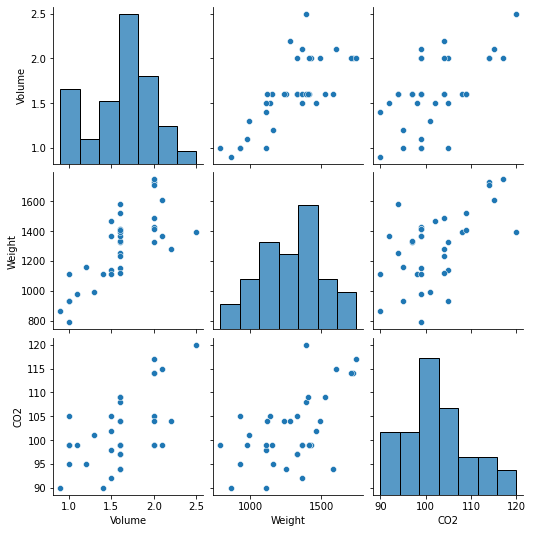

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Volume','Weight']].values
y =df['CO2'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=35)
y_test.shape

(15,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

array([[4.06008932e-04],
       [8.14395917e-01],
       [5.80012760e-05],
       [4.57688069e-01],
       [3.48007656e-04],
       [6.60692535e-01],
       [6.38014036e-04],
       [9.88399745e-01],
       [4.06008932e-04],
       [7.70894960e-01],
       [6.38014036e-04],
       [7.69734934e-01],
       [5.80012760e-05],
       [5.38309843e-01],
       [2.32005104e-04],
       [5.73690621e-01],
       [1.74003828e-04],
       [6.72292790e-01],
       [6.38014036e-04],
       [8.20196044e-01],
       [5.80012760e-05],
       [5.38309843e-01],
       [4.06008932e-04],
       [8.05695725e-01],
       [0.00000000e+00],
       [5.01189026e-01],
       [4.06008932e-04],
       [7.15793747e-01],
       [4.06008932e-04],
       [8.20196044e-01],
       [6.38014036e-04],
       [1.00000000e+00],
       [1.16002552e-04],
       [5.67890494e-01],
       [6.96015312e-04],
       [7.91195406e-01],
       [4.06008932e-04],
       [6.48512267e-01],
       [3.48007656e-04],
       [8.49196682e-01],


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')
model.fit(x=X_train,y=y_train,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 553ms/step - loss: 6394.6992
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 5975.8975
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 5676.2495
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 5428.1104
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 5210.1729
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 5012.5781
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 4829.8423
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 4658.5664
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 4496.4883
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 4342.0146
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 4193.9873
Epoch 12/300
1/1 [==============================] - 0s 7ms/step - loss: 4051.5364
Epoch 13/300
1/1 [====

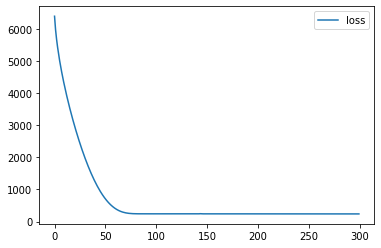

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

252.5763397216797

In [ ]:
test_predictions=model.predict(X_test)
test_predictions

array([[ 72.04529 ],
       [ 75.95818 ],
       [ 99.0237  ],
       [ 89.744484],
       [122.23446 ],
       [ 88.24213 ],
       [105.47264 ],
       [102.487656],
       [105.51996 ],
       [ 85.859985],
       [102.6786  ],
       [ 72.04529 ],
       [105.46318 ],
       [115.07776 ],
       [117.56565 ]], dtype=float32)

In [ ]:
test_predictions = pd.DataFrame(y_test.reshape(15,))

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['True Emmission Values'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)

NameError: ignored

In [ ]:
import pandas as pd
pred_df.columns=pd.Se['True Emmission Values','Model Predictions']
sns.scatterplot(x='True Emmission Values',y='0',data=pred_df)

TypeError: ignored